# NLP Practicum (Twitter Data) - Mo Wei

## Problem Statement: 

This practicum aims to extract the features of tweets and analyze the opinion of tweets as positive, negative or neutral.

**Input:** Textual content of a tweet  
**Output:** Label signifying if the sentiment of the tweet is positive/negative/neutral

**Steps:**

1. Load the libraries
2. Exploratory data analysis
3. Data Preprocessing and Feature Engineering
    - Removal of punctuations (Use regular expression to remove punctuations like @, # etc... also remove **numbers** from tweets)
    - Removal of commonly used words (stopwords).
    - Normalization of words.
4. plot word cloud for top 25 positive and negative tweets
5. Vectorization and Model Selection
    - Vectorization using **`Bag-of-words and TF-IDF`**
    - Select model of your choice
    
6. Performance measure: Classification Report, Confusion matrix and Accuracy score
7. Compare and Interprete the result for Bag-of-words and TF-IDF

In [1]:
# Load Libraries
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import string
import nltk
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer,TfidfVectorizer
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS
from sklearn.decomposition import LatentDirichletAllocation
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import nltk
from nltk.corpus import wordnet
import string
import re
from matplotlib import pyplot as plt

In [2]:
#load train dataset
train_data = pd.read_csv('train_tweets.csv')
for i in range(len(train_data.tweet)):  
    train_data.tweet[i] = train_data.tweet[i].encode(encoding='latin1',errors = 'ignore')-*

<ipython-input-2-076ee6d60e3f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_data.tweet[i] = train_data.tweet[i].encode(encoding='latin1',errors = 'ignore').decode(errors='ignore')


In [3]:
#load test dataset
test_data = pd.read_csv('test_tweets.csv')
for j in range(len(test_data.tweet)):  
    test_data.tweet[j] = test_data.tweet[j].encode(encoding='latin1',errors = 'ignore').decode(errors='ignore')

<ipython-input-3-79741b88ca03>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data.tweet[j] = test_data.tweet[j].encode(encoding='latin1',errors = 'ignore').decode(errors='ignore')


In [4]:
print('train data head: \n', train_data.head())
print('test data head: \n', test_data.head())

train data head: 
    id  label                                              tweet
0   1      0   @user when a father is dysfunctional and is s...
1   2      0  @user @user thanks for #lyft credit i can't us...
2   3      0                                bihday your majesty
3   4      0  #model   i love u take with u all the time in ...
4   5      0             factsguide: society now    #motivation
test data head: 
       id                                              tweet
0  31963  #studiolife #aislife #requires #passion #dedic...
1  31964   @user #white #supremacists want everyone to s...
2  31965  safe ways to heal your #acne!!    #altwaystohe...
3  31966  is the hp and the cursed child book up for res...
4  31967    3rd #bihday to my amazing, hilarious #nephew...


In [5]:
print('train data info: \n', train_data.info)
print('test data info: \n', test_data.info)

train data info: 
 <bound method DataFrame.info of           id  label                                              tweet
0          1      0   @user when a father is dysfunctional and is s...
1          2      0  @user @user thanks for #lyft credit i can't us...
2          3      0                                bihday your majesty
3          4      0  #model   i love u take with u all the time in ...
4          5      0             factsguide: society now    #motivation
...      ...    ...                                                ...
31957  31958      0              ate @user isz that youuu?😍😍😍😍😍😍😍😍😍❤️ 
31958  31959      0    to see nina turner on the airwaves trying to...
31959  31960      0  listening to sad songs on a monday morning otw...
31960  31961      1  @user #sikh #temple vandalised in in #calgary,...
31961  31962      0                   thank you @user for you follow  

[31962 rows x 3 columns]>
test data info: 
 <bound method DataFrame.info of           id        

In [6]:
# train_data.isnull().sum()
print('train data null sum: \n', train_data.isnull().sum())
print('test data null sum: \n', test_data.isnull().sum())

train data null sum: 
 id       0
label    0
tweet    0
dtype: int64
test data null sum: 
 id       0
tweet    0
dtype: int64


In [7]:
train_data['label'].value_counts()

0    29720
1     2242
Name: label, dtype: int64

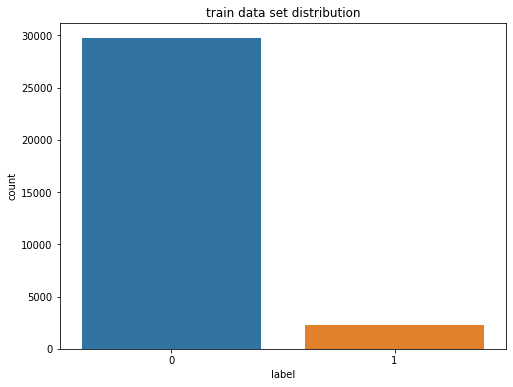

In [8]:
plt.figure(figsize=(8,6))
sns.countplot(x=train_data['label'], data=train_data)
plt.title('train data set distribution')
plt.show()

In [9]:
X_train = train_data['tweet']
Y_train = train_data['label']

X_test = test_data['tweet']

In [10]:
# UDF(User Defined Function) to find sentiment polarity of the reviews
def sentiment_review(text):
    analysis = TextBlob(text)
    polarity_text = analysis.sentiment.polarity
    if polarity_text > 0:
        return 'Positive'
    elif polarity_text == 0:
        return 'Neutral'
    else:
        return 'Negative'  

In [11]:
# creating dictionary which will contain both the tweets and the sentiment of the review
train_dictionary = []
for text in X_train:
    dictionary_sentiment = {}
    dictionary_sentiment['tweet'] = text
    dictionary_sentiment['Sentiment'] = sentiment_review(text)
    train_dictionary.append(dictionary_sentiment)

test_dictionary = []
for text in X_test:
    dictionary_sentiment = {}
    dictionary_sentiment['tweet'] = text
    dictionary_sentiment['Sentiment'] = sentiment_review(text)
    test_dictionary.append(dictionary_sentiment)


In [12]:
# Finding positive reviews for train dataset
positive_train = []
for review in train_dictionary:
    if review['Sentiment'] =='Positive':
        positive_train.append(review)
print('Train dataset positive tweets: \n',positive_train[:5])

# Finding positive reviews for test dataset
positive_test = []
for review in test_dictionary:
    if review['Sentiment'] =='Positive':
        positive_test.append(review)
print('Test dataset positive tweets: \n', positive_test[:5])

Train dataset positive tweets: 
 [{'tweet': "@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked", 'Sentiment': 'Positive'}, {'tweet': '#model   i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦  ', 'Sentiment': 'Positive'}, {'tweet': '[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  ', 'Sentiment': 'Positive'}, {'tweet': 'we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  … ', 'Sentiment': 'Positive'}, {'tweet': " @user @user welcome here !  i'm   it's so #gr8 ! ", 'Sentiment': 'Positive'}]
Test dataset positive tweets: 
 [{'tweet': ' @user #white #supremacists want everyone to see the new ‘  #birds’ #movie — and here’s why  ', 'Sentiment': 'Positive'}, {'tweet': 'safe ways to heal your #acne!!    #altwaystoheal #healthy   #healing!! ', 'Sentiment': 'Positive'}, {'tweet': 'is the hp and the cursed child book up for 

In [13]:
# Finding neutral reviews for train dataset
neutral_train = []
for review in train_dictionary:
    if review['Sentiment'] =='Neutral':
        neutral_train.append(review)
print('Train dataset neutral tweets: \n',neutral_train[:5])

# Finding neutral reviews for test dataset
neutral_test = []
for review in test_dictionary:
    if review['Sentiment'] =='Neutral':
        neutral_test.append(review)
print('Test dataset neutral tweets: \n',neutral_test[:5])

Train dataset neutral tweets: 
 [{'tweet': '  bihday your majesty', 'Sentiment': 'Neutral'}, {'tweet': ' factsguide: society now    #motivation', 'Sentiment': 'Neutral'}, {'tweet': ' @user camping tomorrow @user @user @user @user @user @user @user danny…', 'Sentiment': 'Neutral'}, {'tweet': 'i get to see my daddy today!!   #80days #gettingfed', 'Sentiment': 'Neutral'}, {'tweet': "@user #cnn calls #michigan middle school 'build the wall' chant '' #tcot  ", 'Sentiment': 'Neutral'}]
Test dataset neutral tweets: 
 [{'tweet': '#studiolife #aislife #requires #passion #dedication #willpower   to find #newmaterials… ', 'Sentiment': 'Neutral'}, {'tweet': '#finished#tattoo#inked#ink#loveit❤️ #❤️❤️❤️❤️ #thanks#aleeee !!! ', 'Sentiment': 'Neutral'}, {'tweet': 'i ate,i ate and i ate...😀😊   #jamaisasthi #fish #curry #prawn #hilsa #foodfestival #foodies ', 'Sentiment': 'Neutral'}, {'tweet': '👭🌞💖 #girls   #sun #fave @ london, united kingdom ', 'Sentiment': 'Neutral'}, {'tweet': ' @user @user  @user  #

In [14]:
# Finding negative reviews for negative train dataset
negative_train = []
for review in train_dictionary:
    if review['Sentiment'] =='Negative':
        negative_train.append(review)
print('Train dataset negative tweets: \n', negative_train[:5])

# Finding negative reviews for negative test dataset
negative_test = []
for review in train_dictionary:
    if review['Sentiment'] =='Negative':
        negative_test.append(review)
print('Train dataset negative tweets: \n', negative_test[:5])

Train dataset negative tweets: 
 [{'tweet': ' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run', 'Sentiment': 'Negative'}, {'tweet': "the next school year is the year for exams.😯 can't think about that 😭 #school #exams   #hate #imagine #actorslife #revolutionschool #girl", 'Sentiment': 'Negative'}, {'tweet': ' ↝ #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex', 'Sentiment': 'Negative'}, {'tweet': 'we are so selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking   #values #love #', 'Sentiment': 'Negative'}, {'tweet': 'sad little dude..   #badday #coneofshame #cats #pissed #funny #laughs ', 'Sentiment': 'Negative'}]
Train dataset negative tweets: 
 [{'tweet': ' @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run', 'Sentiment': 'Negative'}, {'tweet': "the next school year is the 

In [15]:
# counting number of positive,neutral and negative reviews
train_count = pd.DataFrame([len(positive_train),len(neutral_train),len(negative_train)],index=['Positive','Neutral','Negative'])
test_count = pd.DataFrame([len(positive_test),len(neutral_test),len(negative_test)],index=['Positive','Neutral','Negative'])

In [16]:
train_count

,0
Positive,15895
Neutral,11347
Negative,4720


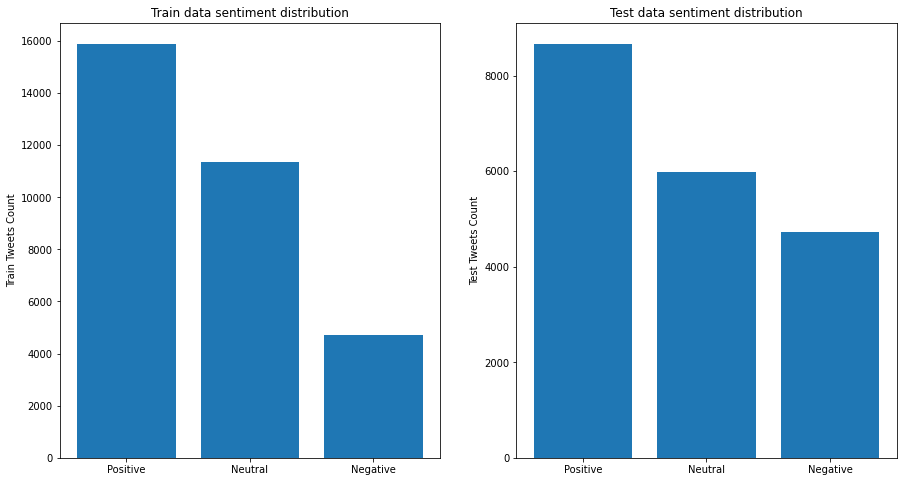

In [17]:
#plot sentiment analysis summary of train and test dataset

def plot_curves_sent():
    fig, axes = plt.subplots(figsize=(15,8),nrows=1, ncols=2)
    # plot train
    axes[0].set_title('Train data sentiment distribution')
#     train_count.plot(kind='bar')
    axes[0].bar(train_count.index,train_count[0])
    axes[0].set_ylabel('Train Tweets Count')
    #plot test
    axes[1].set_title('Test data sentiment distribution')
    axes[1].bar(test_count.index,test_count[0])
    axes[1].set_ylabel('Test Tweets Count')
    return

plot_curves_sent()

In [18]:
# train_count.plot(kind='bar')
# plt.ylabel('Train Tweets Count')
# plt.legend().remove()
# plt.title('Train data sentiment distribution')
# plt.show()

In [19]:
# printing first five positive tweets from train
i=1
print('first five positive tweets from train')
for review in positive_train[:5]:
        print(i)
        print(review['tweet'])
        print('******************************************************')
        i+=1
# printing first five positive tweets from test
i=1
print('first five positive tweets from test')
for review in positive_test[:5]:
        print(i)
        print(review['tweet'])
        print('******************************************************')
        i+=1

first five positive tweets from train
1
@user @user thanks for #lyft credit i can't use cause they don't offer wheelchair vans in pdx.    #disapointed #getthanked
******************************************************
2
#model   i love u take with u all the time in ur📱!!! 😙😎👄👅💦💦💦  
******************************************************
3
[2/2] huge fan fare and big talking before they leave. chaos and pay disputes when they get there. #allshowandnogo  
******************************************************
4
we won!!! love the land!!! #allin #cavs #champions #cleveland #clevelandcavaliers  … 
******************************************************
5
 @user @user welcome here !  i'm   it's so #gr8 ! 
******************************************************
first five positive tweets from test
1
 @user #white #supremacists want everyone to see the new ‘  #birds’ #movie — and here’s why  
******************************************************
2
safe ways to heal your #acne!!    #altwaystohea

In [20]:
# printing first five negative tweets from train
i=1
print('first five negative tweets from train')
for review in negative_train[:5]:
        print(i)
        print(review['tweet'])
        print('******************************************************')
        i+=1
        
# printing first five negative tweets from train
i=1
print('first five negative tweets from test')
for review in negative_test[:5]:
        print(i)
        print(review['tweet'])
        print('******************************************************')
        i+=1

first five negative tweets from train
1
 @user when a father is dysfunctional and is so selfish he drags his kids into his dysfunction.   #run
******************************************************
2
the next school year is the year for exams.😯 can't think about that 😭 #school #exams   #hate #imagine #actorslife #revolutionschool #girl
******************************************************
3
 ↝ #ireland consumer price index (mom) climbed from previous 0.2% to 0.5% in may   #blog #silver #gold #forex
******************************************************
4
we are so selfish. #orlando #standwithorlando #pulseshooting #orlandoshooting #biggerproblems #selfish #heabreaking   #values #love #
******************************************************
5
sad little dude..   #badday #coneofshame #cats #pissed #funny #laughs 
******************************************************
first five negative tweets from test
1
 @user when a father is dysfunctional and is so selfish he drags his kids into his

## Find most frequent used positive and negative words
### Data processing

In [21]:
#Function to remove Punctuation

def clean_text(text):
    text = text.lower()
    text = re.sub(r"@\w+", "", text) #remove mention
#     text_nopunct = "".join([char for char in text if char in (string.punctuation+'0123456789')])# It will discard all punctuations
    text = "".join([char if char in (string.ascii_lowercase+string.ascii_uppercase) else ' ' for char in text])# It will discard all punctuations
    text = ' '.join(text.split())
    return text

X_train= X_train.apply(lambda x: clean_text(x))
X_test= X_test.apply(lambda x: clean_text(x))
X_train.loc[:5]

0    when a father is dysfunctional and is so selfi...
1    thanks for lyft credit i can t use cause they ...
2                                  bihday your majesty
3        model i love u take with u all the time in ur
4                    factsguide society now motivation
5    huge fan fare and big talking before they leav...
Name: tweet, dtype: object

In [22]:
# # removing stopwords

def remove_stopwords(text):
    stopwords = nltk.corpus.stopwords.words('english')
    text = " ".join([word.lower() for word in text.split() if word.lower() not in stopwords])
    return text

X_train= X_train.apply(lambda x: remove_stopwords(x))
X_test= X_test.apply(lambda x: remove_stopwords(x))
X_train.loc[:5]

0    father dysfunctional selfish drags kids dysfun...
1    thanks lyft credit use cause offer wheelchair ...
2                                       bihday majesty
3                          model love u take u time ur
4                        factsguide society motivation
5    huge fan fare big talking leave chaos pay disp...
Name: tweet, dtype: object

In [23]:
# # Data Normalization
stemmer = WordNetLemmatizer()
def normalize_text(text):
    text = " ".join([stemmer.lemmatize(word,wordnet.VERB) for word in text.split()])
#     text = " ".join([stemmer.lemmatize(word, pos='a') for word in text.split()])
    return text
X_train= X_train.apply(lambda x: normalize_text(x))
X_test= X_test.apply(lambda x: normalize_text(x))
X_train.loc[:5]

0    father dysfunctional selfish drag kid dysfunct...
1    thank lyft credit use cause offer wheelchair v...
2                                       bihday majesty
3                          model love u take u time ur
4                        factsguide society motivation
5    huge fan fare big talk leave chaos pay dispute...
Name: tweet, dtype: object

In [24]:
# tokens_vect_train = CountVectorizer(max_features=5000)
# tokens_vect_test = CountVectorizer(max_features=5000)
# tokens_vect_train = CountVectorizer(dtype='float32')
# tokens_vect_test = CountVectorizer(dtype='float32')
tokens_vect_train = CountVectorizer()
tokens_vect_test = CountVectorizer()

In [25]:
token_dtm_train = tokens_vect_train.fit_transform(X_train)
token_dtm_test = tokens_vect_test.fit_transform(X_test)

In [26]:
tokens_vect_train.get_feature_names()[:10]

['aa',
 'aaa',
 'aaaaa',
 'aaaaaand',
 'aaaaah',
 'aaaaand',
 'aaahh',
 'aaahhhh',
 'aaahhhhh',
 'aaand']

In [27]:
tokens_vect_test.get_feature_names()[:10]

['aa',
 'aaa',
 'aaaahhh',
 'aaaahhhh',
 'aaaannndd',
 'aaahhhh',
 'aadmi',
 'aah',
 'aaj',
 'aameen']

In [28]:
token_dtm_train.toarray()
token_dtm_test.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [29]:
token_dtm_train.toarray().shape, token_dtm_test.toarray().shape

((31962, 34181), (17197, 23074))

In [30]:
# token_dtm_test.toarray().shape

In [31]:
len(tokens_vect_train.get_feature_names())

34181

In [32]:
pd.DataFrame(token_dtm_train.toarray(),columns = tokens_vect_train.get_feature_names())

,aa,aaa,aaaaa,aaaaaand,aaaaah,aaaaand,aaahh,aaahhhh,aaahhhhh,aaand,...,zulu,zuma,zumba,zurich,zx,zydeco,zz,zzz,zzzzzz,zzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31957,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31958,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31959,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
31960,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
pd.DataFrame(token_dtm_test.toarray(),columns = tokens_vect_test.get_feature_names())

,aa,aaa,aaaahhh,aaaahhhh,aaaannndd,aaahhhh,aadmi,aah,aaj,aameen,...,zsanet,zsassociates,zshq,zueiraneverends,zuid,zukilloyzukilla,zuks,zumba,zurenborg,zurvita
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17192,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17193,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17194,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
17195,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [34]:
# print(token_dtm)

In [35]:
# creating a dataframe which shows the count of how many times a word is coming in the corpus
count_dtm_train = pd.DataFrame(np.sum(token_dtm_train.toarray(),axis=0),tokens_vect_train.get_feature_names()).reset_index()
count_dtm_train.columns =['Word','Count']

count_dtm_test = pd.DataFrame(np.sum(token_dtm_test.toarray(),axis=0),tokens_vect_test.get_feature_names()).reset_index()
count_dtm_test.columns =['Word','Count']

In [36]:
count_dtm_train.head()

,Word,Count
0,aa,2
1,aaa,3
2,aaaaa,1
3,aaaaaand,1
4,aaaaah,1


In [37]:
count_dtm_test.head()

,Word,Count
0,aa,1
1,aaa,1
2,aaaahhh,1
3,aaaahhhh,1
4,aaaannndd,1


In [38]:
#adding sentiment column which shows sentiment polarity of each word
sentiment_word_train = []
for word in count_dtm_train['Word']:
    sentiment_word_train.append(sentiment_review(word))
count_dtm_train['Sentiment'] = sentiment_word_train

sentiment_word_test = []
for word in count_dtm_test['Word']:
    sentiment_word_test.append(sentiment_review(word))
count_dtm_test['Sentiment'] = sentiment_word_test

In [39]:
# separating positive words
positive_words_train= count_dtm_train.loc[count_dtm_train['Sentiment']=='Positive',:].sort_values('Count',ascending=False)
positive_words_test= count_dtm_test.loc[count_dtm_test['Sentiment']=='Positive',:].sort_values('Count',ascending=False)

In [40]:
positive_words_train.head()

,Word,Count,Sentiment
17711,love,3089,Positive
12932,happy,1707,Positive
20626,new,1003,Positive
23584,positive,937,Positive
27558,smile,925,Positive


In [41]:
positive_words_test.head()

,Word,Count,Sentiment
12015,love,1679,Positive
8745,happy,948,Positive
13925,new,559,Positive
15910,positive,492,Positive
8172,good,472,Positive


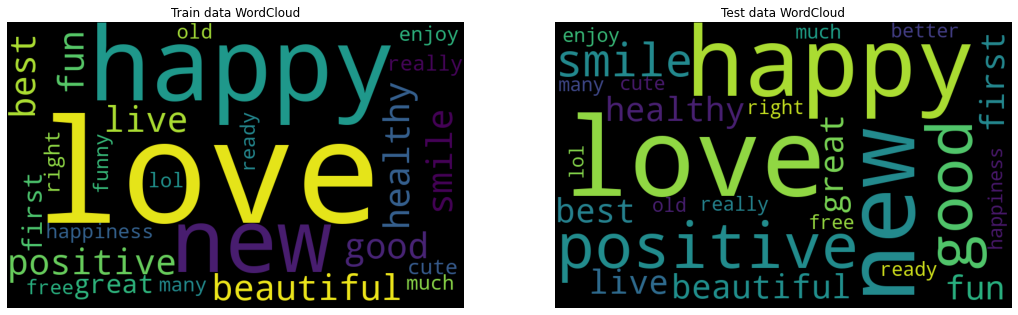

In [42]:
# plotting word cloud of 25 most frequently used positive words
wordcloud_train = WordCloud(width = 800, height = 500).generate(' '.join(positive_words_train.iloc[0:25,0]))
wordcloud_test = WordCloud(width = 800, height = 500).generate(' '.join(positive_words_test.iloc[0:25,0]))
# plot the WordCloud image                        
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
  
# plt.show()


def plot_curves_pos_cloud():
    fig, axes = plt.subplots(figsize=(18,8),nrows=1, ncols=2)
    # plot train
    axes[0].imshow(wordcloud_train) 
    axes[0].set_title('Train data WordCloud')
    axes[0].axis('off')
    #plot test
    axes[1].imshow(wordcloud_test) 
    axes[1].set_title('Test data WordCloud')
    axes[1].axis('off')
    return

plot_curves_pos_cloud()

In [43]:
# separating negative words
negative_words_train= count_dtm_train.loc[count_dtm_train['Sentiment']=='Negative',:].sort_values('Count',ascending=False)
negative_words_test= count_dtm_test.loc[count_dtm_test['Sentiment']=='Negative',:].sort_values('Count',ascending=False)

In [44]:
negative_words_train.head()

,Word,Count,Sentiment
25964,sad,431,Negative
11397,game,331,Negative
17362,little,290,Negative
3246,black,287,Negative
13049,hate,243,Negative


In [45]:
negative_words_test.head()

,Word,Count,Sentiment
17541,sad,229,Negative
7690,game,184,Negative
2175,black,141,Negative
8821,hate,141,Negative
11921,long,140,Negative


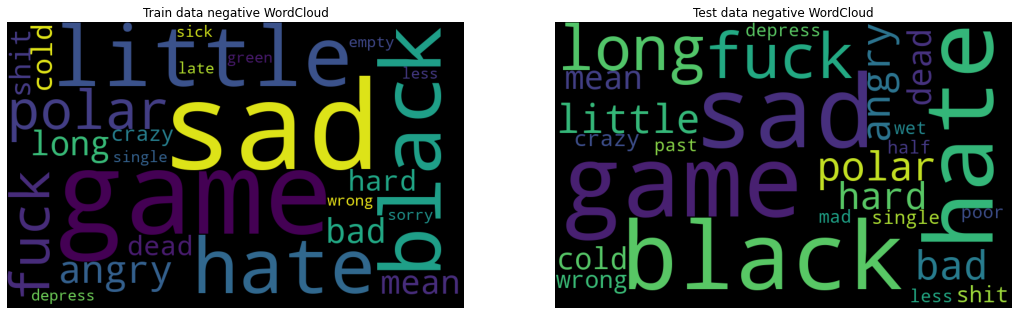

In [46]:
# plotting word cloud of 25 most frequently used negative words
wordcloud_train_neg = WordCloud(width = 800, height = 500).generate(' '.join(negative_words_train.iloc[0:25,0]))
wordcloud_test_neg = WordCloud(width = 800, height = 500).generate(' '.join(negative_words_test.iloc[0:25,0]))
# plot the WordCloud image                        
# plt.figure(figsize = (8, 8), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis("off") 
# plt.tight_layout(pad = 0) 
  
# plt.show()
def plot_curves_pos_cloud():
    fig, axes = plt.subplots(figsize=(18,8),nrows=1, ncols=2)
    # plot train
    axes[0].imshow(wordcloud_train_neg) 
    axes[0].set_title('Train data negative WordCloud')
    axes[0].axis('off')
    #plot test
    axes[1].imshow(wordcloud_test_neg) 
    axes[1].set_title('Test data negative WordCloud')
    axes[1].axis('off')
    return

plot_curves_pos_cloud()


In [47]:
# train_positive = train_data[train_data['label']==1]
# train_negative = train_data[train_data['label']==0]
# print("total number: ",len(train_data))
# print("positive number: ",len(train_positive))
# print("negative number: ", len(train_negative))

### Modelling

#### Splitting the data into train and test

In [48]:
train_X,test_X,train_Y,test_Y = train_test_split(X_train,Y_train,random_state = 0, test_size = 0.2)

import gc
del X_train
del Y_train
gc.collect()

10372

In [49]:
print('No.of observations in train_X: ',len(train_X), '| No.of observations in test_X: ',len(test_X))

No.of observations in train_X:  25569 | No.of observations in test_X:  6393


In [50]:
print('No.of observations in train_Y: ',len(train_Y), '| No.of observations in test_Y: ',len(test_Y))

No.of observations in train_Y:  25569 | No.of observations in test_Y:  6393


## Feature generation using DTM and TDM
### Feature generation using DTM

In [51]:
vect = CountVectorizer(ngram_range=(1,1))

In [52]:
train_X_dtm = vect.fit_transform(train_X)
test_X_dtm = vect.transform(test_X)
X_test_dtm = vect.transform(X_test)

In [53]:
print(train_X_dtm[:3,:])

  (0, 5556)	1
  (0, 8238)	1
  (0, 15289)	1
  (0, 8529)	1
  (0, 19297)	1
  (0, 16764)	1
  (0, 21718)	1
  (0, 19136)	1
  (0, 27101)	1
  (0, 14852)	1
  (0, 15336)	1
  (0, 9605)	1
  (0, 5829)	1
  (1, 17555)	1
  (1, 18721)	1
  (1, 26351)	1
  (1, 1599)	1
  (1, 5507)	1
  (1, 14776)	1
  (2, 25015)	1
  (2, 24560)	1
  (2, 8776)	1
  (2, 21452)	1
  (2, 9015)	1
  (2, 13580)	1


In [54]:
print(test_X_dtm[:3,:])

  (0, 20421)	1
  (0, 25156)	1
  (0, 25885)	2
  (1, 3481)	1
  (1, 5841)	1
  (1, 8436)	1
  (1, 11518)	1
  (1, 14499)	1
  (1, 20549)	1
  (1, 20971)	1
  (1, 23690)	1
  (1, 23794)	1
  (1, 25347)	1
  (1, 26400)	1
  (2, 8974)	1
  (2, 11990)	1
  (2, 14849)	1
  (2, 23127)	1
  (2, 26534)	1


In [55]:
print(X_test_dtm[:3,:])

  (0, 6367)	1
  (0, 8995)	1
  (0, 19478)	1
  (0, 21852)	1
  (0, 24931)	1
  (1, 2747)	1
  (1, 8254)	1
  (1, 17137)	1
  (1, 17869)	1
  (1, 22971)	1
  (1, 25227)	1
  (1, 28113)	1
  (1, 28600)	1
  (2, 160)	1
  (2, 747)	1
  (2, 11409)	2
  (2, 11424)	1
  (2, 22535)	1
  (2, 28228)	1


In [56]:
vect.get_feature_names()[:5]

['aa', 'aaa', 'aaaaa', 'aaaaaand', 'aaaaah']

In [57]:
print('No.of features for are',len(vect.get_feature_names()))

No.of features for are 29626


In [58]:
train_X_dtm_df = pd.DataFrame(train_X_dtm.toarray(),columns=vect.get_feature_names())

In [59]:
train_X_dtm_df.head()

,aa,aaa,aaaaa,aaaaaand,aaaaah,aaahh,aaahhhh,aaahhhhh,aaand,aaberg,...,zshq,zucchini,zuma,zumba,zurich,zx,zydeco,zz,zzzzzz,zzzzzzzz
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [60]:
# Finding how many times a tem is used in corpus
train_dtm_freq = np.sum(train_X_dtm_df,axis=0)
train_dtm_freq

aa          2
aaa         3
aaaaa       1
aaaaaand    1
aaaaah      1
           ..
zx          1
zydeco      2
zz          1
zzzzzz      1
zzzzzzzz    1
Length: 29626, dtype: int64

### Feature using TDM

In [61]:
vect_tdm = TfidfVectorizer(ngram_range=(1,1))

In [62]:
train_X_tdm = vect_tdm.fit_transform(train_X)
test_X_tdm = vect_tdm.transform(test_X)
X_test_tdm = vect_tdm.transform(X_test)

In [63]:
print('No.of features for are',len(vect_tdm.get_feature_names()))

No.of features for are 29626


In [64]:
# creating dataframe to to see which features are present in the documents
train_X_tdm_df = pd.DataFrame(train_X_tdm.toarray(),columns=vect_tdm.get_feature_names())

In [65]:
train_X_tdm_df.describe()

,aa,aaa,aaaaa,aaaaaand,aaaaah,aaahh,aaahhhh,aaahhhhh,aaand,aaberg,...,zshq,zucchini,zuma,zumba,zurich,zx,zydeco,zz,zzzzzz,zzzzzzzz
count,25569.000000,25569.000000,25569.000000,25569.000000,25569.000000,25569.000000,25569.000000,25569.000000,25569.000000,25569.000000,...,25569.000000,25569.000000,25569.000000,25569.000000,25569.000000,25569.000000,25569.000000,25569.000000,25569.000000,25569.000000
mean,0.000030,0.000061,0.000018,0.000022,0.000019,0.000016,0.000014,0.000027,0.000018,0.000039,...,0.000013,0.000016,0.000031,0.000020,0.000061,0.000019,0.000026,0.000016,0.000025,0.000016
std,0.003417,0.005663,0.002799,0.003521,0.003057,0.002480,0.002240,0.004376,0.002801,0.004405,...,0.002132,0.002493,0.003472,0.003178,0.005916,0.002997,0.004212,0.002573,0.004003,0.002637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,0.413111,0.621822,0.447527,0.562942,0.488902,0.396598,0.358213,0.699657,0.447842,0.511636,...,0.340956,0.398700,0.404517,0.508190,0.764328,0.479269,0.673585,0.411482,0.640043,0.421590


In [66]:
# Finding how many times a tem is used in corpus
train_tdm_freq = np.sum(train_X_tdm_df,axis=0)
train_tdm_freq

aa          0.770664
aaa         1.552513
aaaaa       0.447527
aaaaaand    0.562942
aaaaah      0.488902
              ...   
zx          0.479269
zydeco      0.673585
zz          0.411482
zzzzzz      0.640043
zzzzzzzz    0.421590
Length: 29626, dtype: float64

## Building model
#### Build model on DTM

In [67]:
# # building naive bayes model on DTM
built_model = MultinomialNB(alpha=0.45)
built_model.fit(train_X_dtm,train_Y)

# # building model on DTM
# built_model = LogisticRegression()
# built_model.fit(train_X_dtm,train_Y)

MultinomialNB(alpha=0.45)

In [68]:
predict_train = built_model.predict(train_X_dtm)
predict_test = built_model.predict(test_X_dtm)

First 5 predicted results from test.csv: 
    0
0  0
1  0
2  0
3  0
4  0


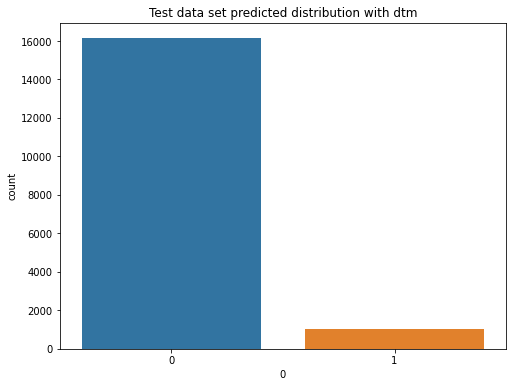

In [69]:

test_predict = built_model.predict(X_test_dtm)
test_predict = pd.DataFrame(test_predict)
print('First 5 predicted results from test.csv: \n', test_predict[:5])
plt.figure(figsize=(8,6))
sns.countplot(x=test_predict[0], data=test_predict)
plt.title('Test data set predicted distribution with dtm')
plt.show()

In [70]:
print('Classification for training data: \n', metrics.classification_report(train_Y,predict_train))
print('Classification for testing data: \n', metrics.classification_report(test_Y,predict_test))

Classification for training data: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99     23735
           1       0.81      0.85      0.83      1834

    accuracy                           0.98     25569
   macro avg       0.90      0.92      0.91     25569
weighted avg       0.98      0.98      0.98     25569

Classification for testing data: 
               precision    recall  f1-score   support

           0       0.98      0.99      0.98      5985
           1       0.75      0.64      0.69       408

    accuracy                           0.96      6393
   macro avg       0.86      0.81      0.83      6393
weighted avg       0.96      0.96      0.96      6393



In [71]:
print('Accuracy on train: ',metrics.accuracy_score(train_Y,predict_train))
print('Accuracy on test: ',metrics.accuracy_score(test_Y,predict_test))

Accuracy on train:  0.9755563377527474
Accuracy on test:  0.9632410448928516


In [72]:
# predict probabilities on train and test
predict_prob_train = built_model.predict_proba(train_X_dtm)[:,1]
predict_prob_test = built_model.predict_proba(test_X_dtm)[:,1]

# predict_prob_train = built_model.predict(train_X_dtm)
# predict_prob_test = built_model.predict(test_X_dtm)

In [73]:
print('ROC_AUC score on train: ',metrics.roc_auc_score(train_Y,predict_prob_train))
print('ROC_AUC score on test: ',metrics.roc_auc_score(test_Y,predict_prob_test))

ROC_AUC score on train:  0.9857971596134067
ROC_AUC score on test:  0.9543816649466804


In [74]:
# confusion matrix on test 
cm_test = metrics.confusion_matrix(test_Y,predict_test)

In [75]:
cm_test

array([[5898,   87],
       [ 148,  260]], dtype=int64)

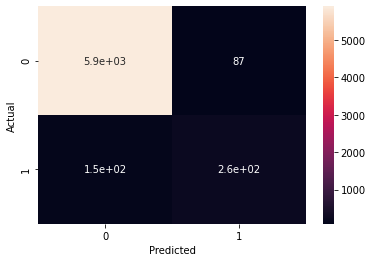

In [76]:
import seaborn as sns
sns.heatmap(cm_test,annot=True,xticklabels=[0,1],yticklabels=[0,1])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

#### Building Model on TDM

In [77]:
# # building naive bayes model on TDM
built_model = MultinomialNB(alpha=0.45)
built_model.fit(train_X_tdm,train_Y)

# # building naive bayes model on TDM
# built_model = LogisticRegression()
# built_model.fit(train_X_tdm,train_Y)

MultinomialNB(alpha=0.45)

In [78]:
predict_train = built_model.predict(train_X_tdm)
predict_test = built_model.predict(test_X_tdm)

First 5 predicted results from test.csv: 
    0
0  0
1  0
2  0
3  0
4  0


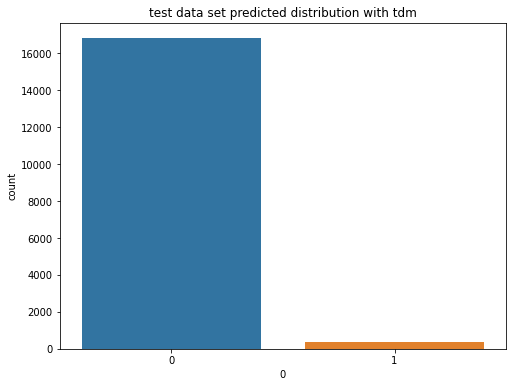

In [79]:

# test_predict = collections.Counter(built_model.predict(X_test_dtm))
# test_predict = pd.DataFrame.from_dict(test_predict, orient='index')
# test_predict
test_predict = built_model.predict(X_test_tdm)
test_predict = pd.DataFrame(test_predict)
print('First 5 predicted results from test.csv: \n', test_predict[:5])

plt.figure(figsize=(8,6))
sns.countplot(x=test_predict[0], data=test_predict)
plt.title('test data set predicted distribution with tdm')
plt.show()

In [80]:
print('Classification for training data: \n', metrics.classification_report(train_Y,predict_train))
print('Classification for testing data:: \n', metrics.classification_report(test_Y,predict_test))

Classification for training data: 
               precision    recall  f1-score   support

           0       0.96      1.00      0.98     23735
           1       0.99      0.48      0.64      1834

    accuracy                           0.96     25569
   macro avg       0.98      0.74      0.81     25569
weighted avg       0.96      0.96      0.96     25569

Classification for testing data:: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.98      5985
           1       0.98      0.28      0.44       408

    accuracy                           0.95      6393
   macro avg       0.97      0.64      0.71      6393
weighted avg       0.96      0.95      0.94      6393



In [81]:
print('Accuracy on train: ',metrics.accuracy_score(train_Y,predict_train))
print('Accuracy on test: ',metrics.accuracy_score(test_Y,predict_test))

Accuracy on train:  0.9621807657710508
Accuracy on test:  0.9540122008446739


In [82]:
# predict probabilities on train and test
predict_prob_train = built_model.predict_proba(train_X_tdm)[:,1]
predict_prob_test = built_model.predict_proba(test_X_tdm)[:,1]

# predict_prob_train = built_model.predict(train_X_tdm)
# predict_prob_test = built_model.predict(test_X_tdm)

In [83]:
print('ROC_AUC score on train: ',metrics.roc_auc_score(train_Y,predict_prob_train))
print('ROC_AUC score on test: ',metrics.roc_auc_score(test_Y,predict_prob_test))

ROC_AUC score on train:  0.9759417817463316
ROC_AUC score on test:  0.942380665716579


In [84]:
# confusion matrix on test 
cm_test = metrics.confusion_matrix(test_Y,predict_test, labels=[0,1])

In [85]:
cm_test

array([[5983,    2],
       [ 292,  116]], dtype=int64)

In [86]:
# tn, fp, fn, tp = metrics.confusion_matrix(test_Y,predict_test).ravel()
# tn, fp, fn, tp

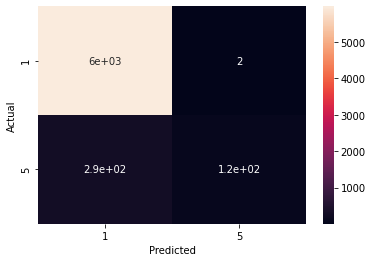

In [87]:
import seaborn as sns
sns.heatmap(cm_test,annot=True,xticklabels=[1,5],yticklabels=[1,5])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

## Interpretation of DTM and TDM

Answer: 


- Document Term Matrix (DTM) as an implementation of the Bag of Words concept. Term Document Matrix is tracking the term frequency for each term by each document. Starting with the Bag of Words representation of the documents and then for each document, track the number of time a term exists. A Document Term matrix can become a very large, sparse matrix (so much 0s than values) depending on the number of documents in the corpus and the number of terms in each document.

- Count vectorizer is to simply count the times that the term appears in the document and it will be the value of cell (document, term).

- TFIDF, short for term frequency–inverse document frequency, is a numerical statistic that is intended to reflect how important a word is to a document in a collection or corpus. It is often used as a weighting factor in searches of information retrieval, text mining, and user modeling. The tf–idf value increases proportionally to the number of times a word appears in the document and is offset by the number of documents in the corpus that contain the word, which helps to adjust for the fact that some words appear more frequently in general.

- Due to the numerical statistical nature of TFIDF TDM, the performance is slightly better compare to CountVectorizer DTM for this Twitter Data sentiment analysis. 
